<a href="https://colab.research.google.com/github/AhsenTahir/Breast_Cancer_Prediction-with-ANN/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the Dataset
cancer = load_breast_cancer()
cancer_data = cancer['data']
cancer_label = cancer['target']
cancer_feature_names = cancer['feature_names']
cancer_label_names = cancer['target_names']

df = pd.DataFrame(cancer_data, columns=cancer_feature_names)
df['label'] = cancer_label

print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [ ]:
df.columns.str.replace(' ', '_')

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'label'],
      dtype='object')

In [ ]:
X = df.drop('label', axis=1)
y = df['label']
#scaling for better results
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable
df_combined = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Extract the correlation of each feature with the target label
correlation_with_label = correlation_matrix['label'].sort_values(ascending=False)
print(correlation_with_label)

label                      1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [ ]:
# Setting a threshold for weak correlation
threshold = 0.1

# Identifying features with weak correlations
weak_corr_features = correlation_with_label[abs(correlation_with_label) < threshold].index

# Drop these features from your dataset
X_reduced = X_scaled_df.drop(columns=weak_corr_features)
X_reduced.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.489734,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,0.499255,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,1.228676,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,0.326373,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,1.270543,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Define and build the model with L1 regularization
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu',
                kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/50
15/15 [==============================] - 2s 23ms/step - loss: 12.9327 - accuracy: 0.6769 - val_loss: 11.8885 - val_accuracy: 0.8246
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 11.0966 - accuracy: 0.8923 - val_loss: 10.1555 - val_accuracy: 0.8860
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 9.4252 - accuracy: 0.9165 - val_loss: 8.5732 - val_accuracy: 0.9386
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 7.9074 - accuracy: 0.9385 - val_loss: 7.1334 - val_accuracy: 0.9561
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 6.5331 - accuracy: 0.9495 - val_loss: 5.8398 - val_accuracy: 0.9561
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 5.3048 - accuracy: 0.9495 - val_loss: 4.6882 - val_accuracy: 0.9474
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 4.2201 - accuracy: 0.9538 - val_loss: 3.6876 - val_accuracy: 0.9474
Epoch 8/50
15/1

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


4/4 [==============================] - 0s 4ms/step - loss: 0.2550 - accuracy: 0.9737
Test Loss: 0.2550235092639923
Test Accuracy: 0.9736841917037964


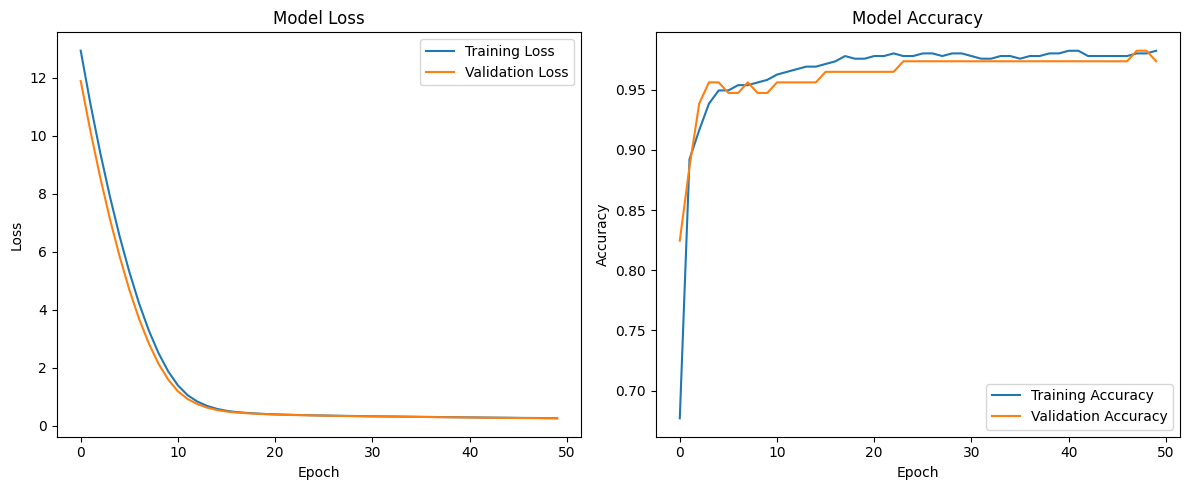

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
